In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [76]:
class Marker:
    x = 0
    y = 0
    z = 0 
    name = ''
    number =0
    
    def __init__(self, x,y,z,name,number):      
        self.x = x
        self.y = y
        self.z = z
        self.name = name
        self.number = number
    
    def plot_marker (self, ax):
        ax.scatter(x,y,z,s=50, marker='d', color="g")   
    
    def plot_marker_with_name (self,ax):
        self.plot_marker (ax)
        ax.text(x,y,z,'%s' % (self.name), size=50, zorder=1,)

    def plot_marker_with_number (self,ax):
        self.plot_marker (ax)
        ax.text(x,y,z, '%s''%s' % ('  ',self.number), size=50, zorder=1,)



In [77]:
marker01= Marker(0,0,0,'',0)
marker02= Marker(0,0,0,'',0)

class Link: 
    marker1 = marker01
    marker2 = marker02
    color = 'k'
  
    def __init__(self, marker1, marker2, color):      
        self.marker1 = marker1
        self.marker2 = marker2
        self.color = color
        
        
    def plot_link (self,ax):
        X= [marker1.x , marker2.x]
        Y= [marker1.y , marker2.y]
        Z= [marker1.z , marker2.z]
        ax.plot(X,Y,Z, color=self.color)

        

In [78]:
class Skeleton: 
    markers = []
    links = []
    
    def __init__(self, markers, links):      
        self.markers = markers
        self.links = links

    def plot_all_markers(self, ax): 
        nMarkers = len(markers)
        for i in range (0,nMarkers):
            markers[i].plot_marker(ax)
     
    
    def plot_all_markers_with_names(self, ax): 
        nMarkers = len(markers)
        for i in range (0,nMarkers):
            markers[i].plot_marker_with_name(ax)
                                              
    
    def plot_all_markers_with_numbers(self, ax): 
        nMarkers = len(markers)
        for i in range (0,nMarkers):
            markers[i].plot_marker_with_number(ax)
    
    
    def plot_all_links(self, ax) :
        nLinks = len(links)
        for i in range (0,nLinks) :
            links[i].plot_link(ax)
        
        
 

In [79]:
def new_figure () :
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    #ax.set_xlim3d(50,80)
    #ax.set_ylim3d(80, 180)
    #ax.set_zlim3d(0, 180) 
    ax.view_init(0, -35)
    #ax.view_init(50, -35)
    #ax.set_axis_off()
    return   fig, ax

def data_to_df (data, temps) :
    l=data.shape[1]-5
    datax=[]; datay=[]; dataz=[]
    for i in range (0,l,3):
        datax.append(data.loc[:,data.columns[i]][temps])  #extract all the x's from the first column and store them in datax list
        datay.append(data.loc[:,data.columns[i+1]][temps])  #extract all the y's from the first column and store them in datay list
        dataz.append(data.loc[:,data.columns[i+2]][temps])  #extract all the z's from the first column and store them in dataz list
    ar=np.array([datax,datay,dataz])
    df = pd.DataFrame(ar, index = ['x', 'y', 'z'])
    return df

def plot_head (data,ax,temps) :
    x_head = data.loc[:,12][temps]
    y_head = data.loc[:,14][temps]
    z_head = data.loc[:,13][temps]
    ax.scatter(x_head,y_head,z_head,s=400, marker='o', color="k")



def animate(i):
    print(i)
    df= data_to_df (data, i*2)
    ax=new_figure()
    plot_all_sensors_with_numbers(df,ax)
    plot_all_segments(df,ax)
    ax.view_init(10,5)
    plot_head (data,ax,i*2)
    

In [80]:
data = pd.read_csv ('P33__0_637.txt', delimiter="\t" , header=None)
print(data)

                                                    0
0   1.821599426269531250e+02,1.835730133056640625e...
1   1.021480865478515625e+02,1.023423461914062500e...
2   -4.720216751098632812e+01,-4.76463737487792968...
3   1.826402587890625000e+02,1.840417785644531250e...
4   1.360604248046875000e+02,1.362593231201171875e...
5   -4.524681472778320312e+01,-4.57702102661132812...
6   1.883345642089843750e+02,1.897041931152343750e...
7   1.636293792724609375e+02,1.638403015136718750e...
8   -4.504585647583007812e+01,-4.55852775573730468...
9   1.844033050537109375e+02,1.857998657226562500e...
10  1.522263641357421875e+02,1.524272613525390625e...
11  -4.453091049194335938e+01,-4.50880279541015625...
12  1.932935791015625000e+02,1.946420440673828125e...
13  1.756351623535156250e+02,1.758539886474609375e...
14  -4.567126464843750000e+01,-4.62262535095214843...
15  1.795528869628906250e+02,1.810042266845703125e...
16  1.509017639160156250e+02,1.511030883789062500e...
17  -5.860982513427734375e+0

In [81]:
dt= pd.DataFrame (data)
dt

,0
0,"1.821599426269531250e+02,1.835730133056640625e..."
1,"1.021480865478515625e+02,1.023423461914062500e..."
2,"-4.720216751098632812e+01,-4.76463737487792968..."
3,"1.826402587890625000e+02,1.840417785644531250e..."
4,"1.360604248046875000e+02,1.362593231201171875e..."
5,"-4.524681472778320312e+01,-4.57702102661132812..."
6,"1.883345642089843750e+02,1.897041931152343750e..."
7,"1.636293792724609375e+02,1.638403015136718750e..."
8,"-4.504585647583007812e+01,-4.55852775573730468..."
9,"1.844033050537109375e+02,1.857998657226562500e..."


In [82]:
data = pd.read_csv ('P33__0_637.txt', delimiter=",", header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,182.159943,183.573013,184.892700,186.097595,187.342865,188.639725,189.929398,191.189026,192.398697,248.042572,...,315.436371,314.597351,313.728973,312.805237,311.783081,310.811035,309.831909,308.866699,307.891663,306.925690
1,102.148087,102.342346,102.504585,102.627571,102.726173,102.783524,102.801048,102.780731,102.768234,102.737999,...,102.704651,102.692802,102.669342,102.623512,102.522820,102.392937,102.253601,102.172714,102.031670,101.782593
2,-47.202168,-47.646374,-48.149532,-48.673496,-49.167725,-49.572037,-49.963036,-50.387321,-50.815861,-69.875916,...,-20.818909,-20.362974,-19.876432,-19.350195,-18.834438,-18.316101,-17.657957,-16.968615,-16.272472,-15.543994
3,182.640259,184.041779,185.357834,186.563766,187.836456,189.181168,190.519913,191.811356,193.017960,248.647064,...,315.277008,314.423492,313.537018,312.590881,311.509460,310.502655,309.520630,308.610962,307.732452,306.885406
4,136.060425,136.259323,136.425980,136.552948,136.655106,136.715775,136.737823,136.723114,136.716904,136.689850,...,136.657562,136.646729,136.624054,136.579132,136.481583,136.353989,136.217087,136.138214,135.998535,135.750137
5,-45.246815,-45.770210,-46.354046,-46.955238,-47.529392,-48.019676,-48.531944,-49.111393,-49.717869,-68.872353,...,-21.948347,-21.458891,-20.944948,-20.385027,-19.744822,-19.124140,-18.355244,-17.585087,-16.844475,-16.096697
6,188.334564,189.704193,190.999252,192.195786,193.481903,194.855942,196.233719,197.561111,198.786621,254.409256,...,310.722656,309.809113,308.863556,307.862335,306.707184,305.626556,304.623474,303.706299,302.842133,302.023163
7,163.629379,163.840302,164.015854,164.147919,164.250076,164.307465,164.323425,164.302002,164.290894,164.265427,...,164.502960,164.477966,164.440308,164.380722,164.265900,164.116241,163.972244,163.883316,163.736053,163.482040
8,-45.045856,-45.585278,-46.188889,-46.811920,-47.412243,-47.932045,-48.492085,-49.137268,-49.822025,-69.015869,...,-20.880754,-20.383577,-19.851608,-19.260679,-18.545160,-17.835976,-17.008184,-16.177170,-15.392597,-14.614838
9,184.403305,185.799866,187.114853,188.322021,189.608749,190.977417,192.340652,193.648300,194.854507,250.477142,...,313.775269,312.909790,312.010101,311.049347,309.935730,308.908783,307.921661,307.034912,306.199036,305.405151


In [83]:
data = data.transpose()
data

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,182.159943,102.148087,-47.202168,182.640259,136.060425,-45.246815,188.334564,163.629379,-45.045856,184.403305,...,59.613396,-46.295288,182.464508,17.483194,-48.654102,0.050860,0.007618,0.026687,0.019762,8.0
1,183.573013,102.342346,-47.646374,184.041779,136.259323,-45.770210,189.704193,163.840302,-45.585278,185.799866,...,59.577724,-46.469093,182.591125,17.530760,-48.705097,0.048110,0.011871,0.011140,0.020309,8.0
2,184.892700,102.504585,-48.149532,185.357834,136.425980,-46.354046,190.999252,164.015854,-46.188889,187.114853,...,59.537380,-46.658775,182.719360,17.572605,-48.758919,0.030560,0.014054,0.034829,0.018485,8.0
3,186.097595,102.627571,-48.673496,186.563766,136.552948,-46.955238,192.195786,164.147919,-46.811920,188.322021,...,59.490097,-46.852486,182.836838,17.611105,-48.819607,0.032500,0.027869,0.030981,0.024035,8.0
4,187.342865,102.726173,-49.167725,187.836456,136.655106,-47.529392,193.481903,164.250076,-47.412243,189.608749,...,59.438007,-47.040127,182.953308,17.651609,-48.878345,0.010675,0.008275,0.012326,0.027074,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,310.811035,102.392937,-18.316101,310.502655,136.353989,-19.124140,305.626556,164.116241,-17.835976,308.908783,...,58.507198,-22.920517,324.229584,17.805637,-19.075262,0.019463,0.004476,0.020022,0.009482,8.0
176,309.831909,102.253601,-17.657957,309.520630,136.217087,-18.355244,304.623474,163.972244,-17.008184,307.921661,...,58.392586,-22.564081,324.152435,17.823261,-18.996157,0.029985,0.006057,0.019288,0.021403,8.0
177,308.866699,102.172714,-16.968615,308.610962,136.138214,-17.585087,303.706299,163.883316,-16.177170,307.034912,...,58.341324,-22.183836,324.137329,17.911697,-18.920004,0.028629,0.004299,0.061249,0.014911,8.0
178,307.891663,102.031670,-16.272472,307.732452,135.998535,-16.844475,302.842133,163.736053,-15.392597,306.199036,...,58.238773,-21.735947,324.157349,17.966608,-18.794537,0.013782,0.005068,0.040634,0.020916,8.0


In [84]:
d=data.loc[:,0]

In [85]:
l=data.shape[0]
links_right=np.array([[3,5],[5,6],[6,7],[0,11],[11,12],[12,13]])
links_left=np.array([[3,8],[8,9],[9,10],[0,14],[14,15],[15,16]])
links_axial=np.array([[4, 2],[2,3],[3,1],[1,0]])
links_num=[links_right,links_left,links_axial]
markers_name=['Pelvis','Neck','Shoulders','Head','Right Upper Arm','Right Forearm','Right Hand','Left Upper Arm','Left Forearm','Left Hand','Right Upper Leg','Right Lower Leg','Right Foot','Left Upper Leg','Left Lower Leg','Left Foot']

In [86]:
links_right

array([[ 3,  5],
       [ 5,  6],
       [ 6,  7],
       [ 0, 11],
       [11, 12],
       [12, 13]])

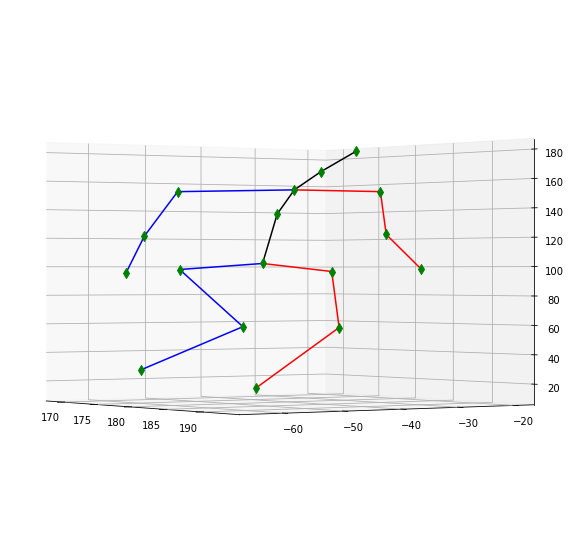

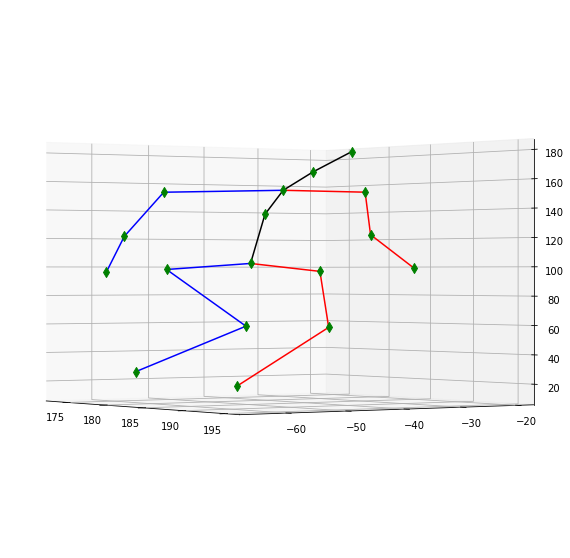

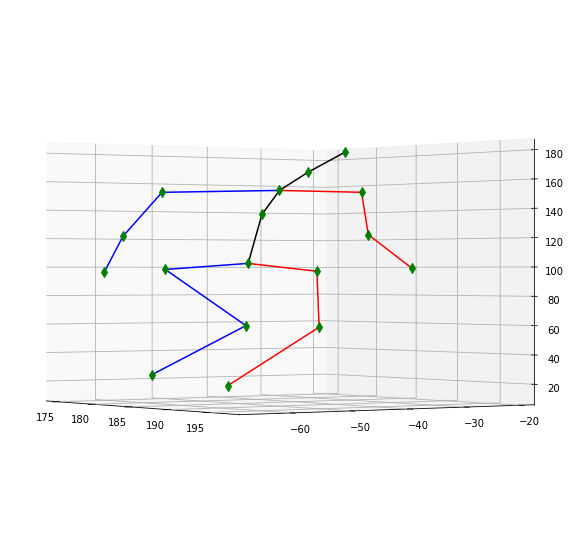

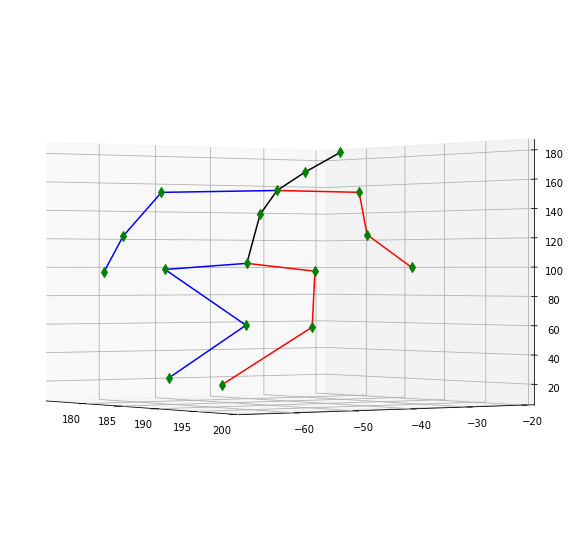

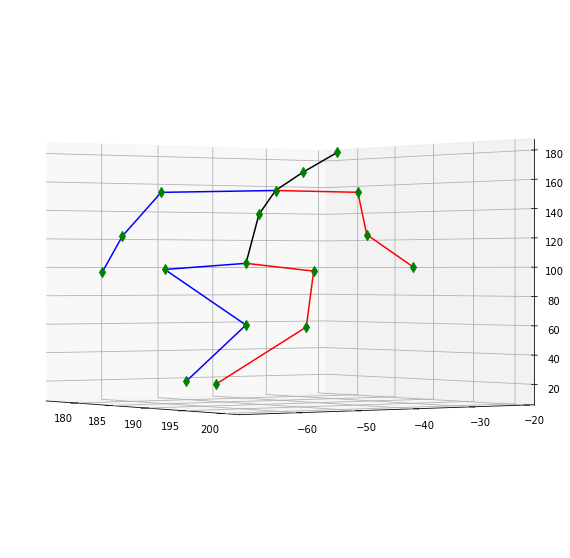

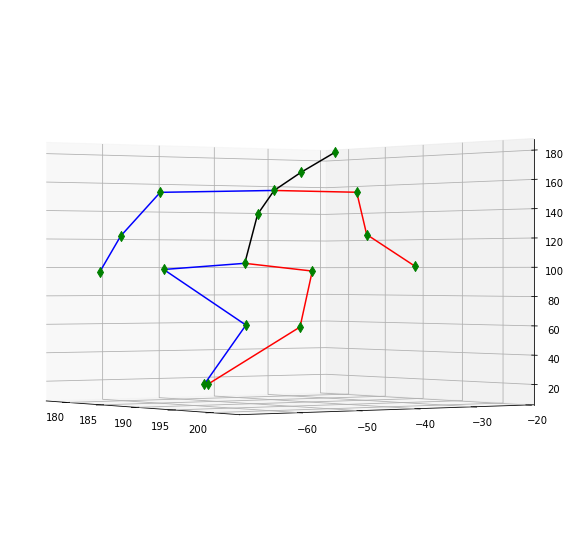

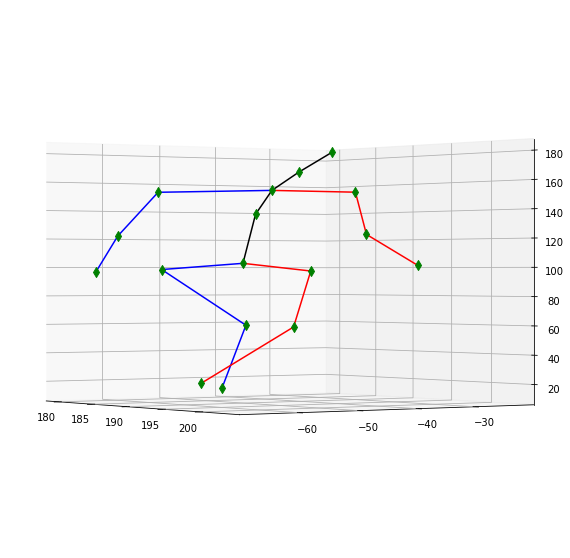

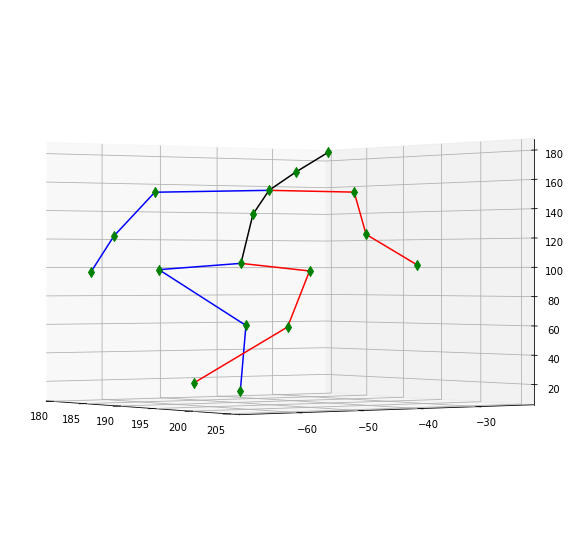

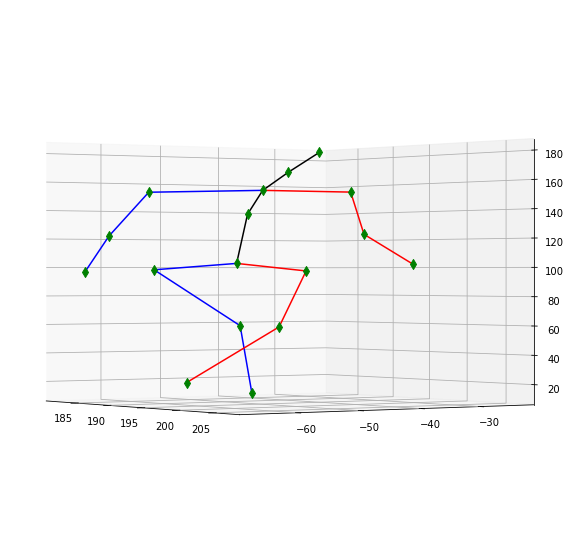

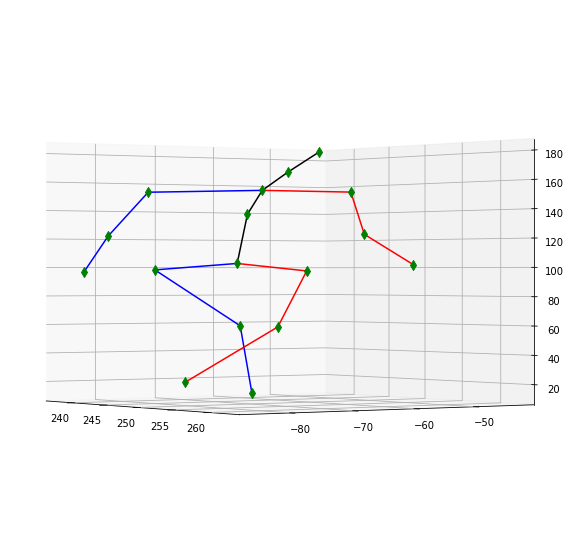

In [93]:
markers=[]
links=[]


for i in range (10) :
    fig, ax = new_figure()
    df= data_to_df (data, i)
    
    
    #construire la liste des markers
    nMarkers = len(df.columns)
    for i in range (0,nMarkers): 
        markerNum = df.columns[i]
        x=df.loc[:,markerNum][0]
        z=df.loc[:,markerNum][1]
        y=df.loc[:,markerNum][2]
        marker = Marker (x,y,z,markers_name[i-1],i+1)
        markers.append(marker)
        markers[i].plot_marker(ax)


        
    #construire la liste des links       
    for n in range (3) :
        links_=links_num[n]
        for k in range (0,len(links_)) :
            xx= np.array (df.loc[:,links_[k]].loc['x',:])
            x1= xx[0]; x2 =xx[1]
            yy=np.array(df.loc[:,links_[k]].loc['z',:])
            y1= yy[0]; y2 = yy[1]
            zz= np.array (df.loc[:,links_[k]].loc['y',:])
            z1= zz[0]; z2 = zz[1]
            number1 = links_[k][0]-1 ; number2 = links_[k][1]-1
            name1 = markers_name[number1] ; name2 = markers_name[number2]

            marker1= Marker (x1,y1,z1,name1, number1)
            marker2= Marker (x2,y2,z2,name2, number2)

            if n==0 : 
                link= Link(marker1,marker2,'b')
                links.append(link)
                link.plot_link(ax)
            if n==1 : 
                link= Link(marker1,marker2,'r')
                links.append(link)
                link.plot_link(ax)
            if n==2 : 
                link= Link(marker1,marker2,'k')
                links.append(link)
                link.plot_link(ax)
                


Text(0.5, 1.0, 'Pelvis x au cours du temps')

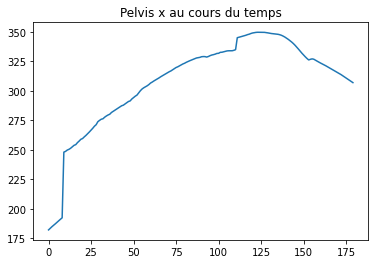

In [88]:
fig=plt.figure()
dd=np.array([m for m in range (0,180)])
plt.plot(dd,data.loc[:,0])
plt.title('Pelvis x au cours du temps')

Text(0.5, 1.0, 'Pelvis y au cours du temps')

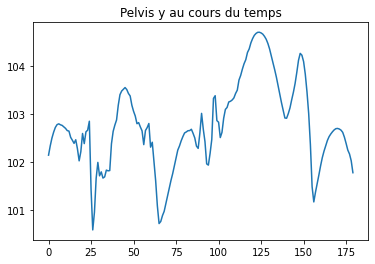

In [89]:
fig=plt.figure()
dd=np.array([m for m in range (0,180)])
plt.plot(dd,data.loc[:,1])
plt.title('Pelvis y au cours du temps')

Text(0.5, 1.0, 'Pelvis z au cours du temps')

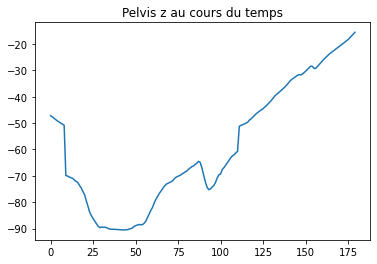

In [90]:
fig=plt.figure()
dd=np.array([m for m in range (0,180)])
plt.plot(dd,data.loc[:,2])
plt.title('Pelvis z au cours du temps')

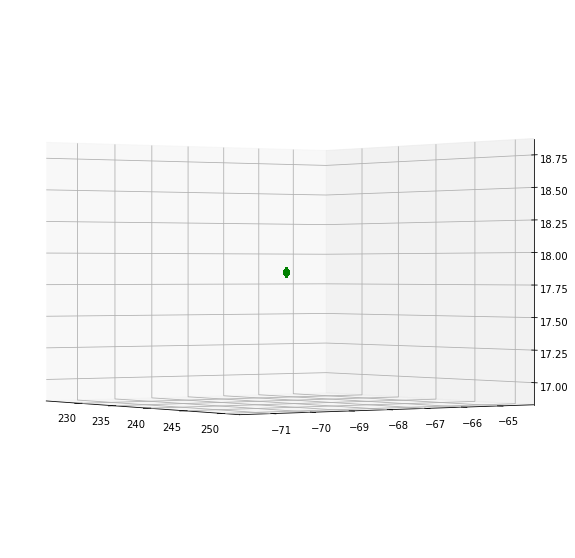

In [91]:
skeleton = Skeleton (markers, links)

fig, ax = new_figure()

skeleton.plot_all_markers(ax)

In [92]:

writer = animation.FFMpegWriter(fps=20, metadata=dict(artist='Me'), bitrate=1800)


fig = plt.figure(figsize=(10,10))


ani = matplotlib.animation.FuncAnimation(fig, animate, frames=int(data.shape[0]/10), repeat=True)



C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


<Figure size 720x720 with 0 Axes>